In [6]:
# 라이브러리 추가
import pandas as pd
import geopandas as gpd # dependencies: shapely, GDAL, Fiona, pyproj
import numpy as np
import seaborn as sns; sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.2)
import matplotlib.pyplot as plt

In [3]:
# 언론사 목록
df = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df['언론사'].unique()

array(['국민일보', '제민일보', '한국일보', '경향신문', '한라일보', '대전일보', '강원일보', '충청일보',
       '중부매일', '중도일보', '충북일보', '헤럴드경제', '아시아경제', '경인일보', '경기일보', '중부일보',
       '동아일보', '전남일보', '충청투데이', '머니투데이', '매일경제', '서울경제', '부산일보', '서울신문',
       '아주경제', '중앙일보', '전북도민일보', '전북일보', '경남도민일보', '세계일보', '경남신문', '광주일보',
       '한겨레', '한국경제', '내일신문', '강원도민일보', '매일신문', '무등일보', '문화일보', '경상일보',
       '광주매일신문', '울산매일', '국제신문', '디지털타임스', '파이낸셜뉴스', '영남일보', '대구일보',
       'SBS', '전자신문', 'YTN', 'KBS', 'MBC'], dtype=object)

In [4]:
# 언론사별 깃대종 기사건수
df1 = df.groupby(df['언론사']).size().reset_index(name='기사건수')
df1 = df1.sort_values(by='기사건수', ascending=False)
df1.head(10)

,언론사,기사건수
39,중도일보,87
36,전북일보,65
45,충청투데이,56
40,중부매일,53
4,강원도민일보,50
11,경향신문,41
35,전북도민일보,40
7,경남도민일보,37
47,한겨레,35
30,아시아경제,28


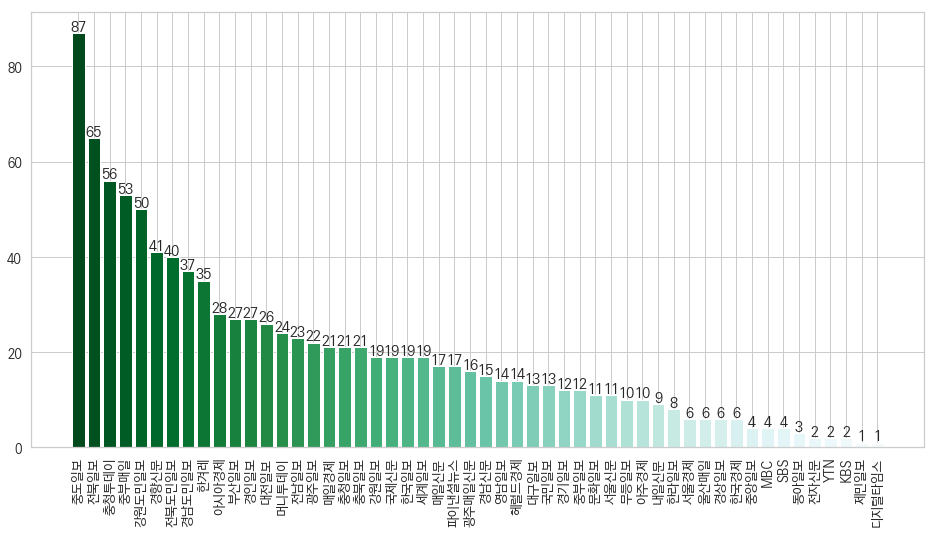

In [7]:
# 언론사별 깃대종 기사건수 바 플롯
f, ax = plt.subplots(figsize=(16, 8));  plt.xticks(rotation=90)
plot = ax.bar(df1['언론사'], df1['기사건수'], color=sns.color_palette("BuGn_r", df1['언론사'].count()))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [8]:
# 시도경계 Shapefile
shapefile = 'D:\GEODATA\gadm36_KOR_1.shp'
gdf = gpd.read_file(shapefile)[['NAME_1', 'geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"(POLYGON ((128.99403381 34.98180389, 128.99403..."
1,Chungcheongbuk-do,"POLYGON ((128.01719666 36.20694733, 128.014709..."
2,Chungcheongnam-do,"(POLYGON ((126.61458588 36.06735992, 126.61458..."
3,Daegu,"POLYGON ((128.6879425 35.68164825, 128.6754303..."
4,Daejeon,"POLYGON ((127.38994598 36.20080566, 127.381622..."
5,Gangwon-do,"(POLYGON ((129.32624817 37.2859726, 129.326248..."
6,Gwangju,"POLYGON ((127.01669312 35.10629272, 127.010910..."
7,Gyeonggi-do,"(POLYGON ((126.72736359 37.01402664, 126.72736..."
8,Gyeongsangbuk-do,"(POLYGON ((129.4229126 36.01874924, 129.422912..."
9,Gyeongsangnam-do,"(POLYGON ((128.73097229 34.53930664, 128.73097..."


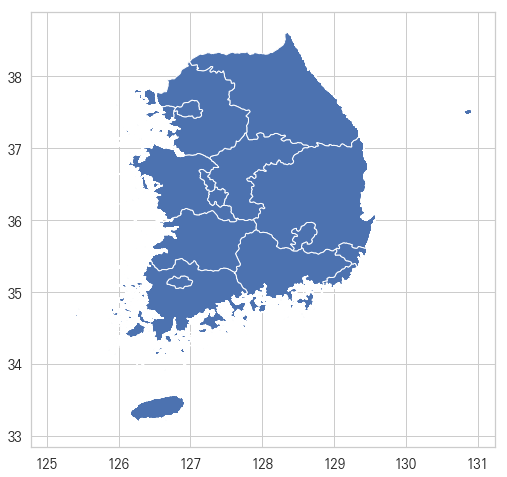

In [9]:
# 시도경계 지도화
gdf.plot(figsize=(16, 8))
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

In [10]:
# 언론사별 시도
conditions = [
    (df1['언론사'] == '경기일보') | (df1['언론사'] == '경인일보') | (df1['언론사'] == 'OBS'),
    (df1['언론사'] == '강원도민일보') | (df1['언론사'] == '강원일보'),
    (df1['언론사'] == '대전일보') | (df1['언론사'] == '중도일보') | (df1['언론사'] == '충청투데이'),
    (df1['언론사'] == '중부매일') | (df1['언론사'] == '충북일보') | (df1['언론사'] == '충청일보'),
    (df1['언론사'] == '경남도민일보') | (df1['언론사'] == '경남신문'),
    (df1['언론사'] == '경상일보') | (df1['언론사'] == '울산매일'),
    (df1['언론사'] == '국제신문') | (df1['언론사'] == '부산일보'),
    (df1['언론사'] == '대구일보') | (df1['언론사'] == '매일신문') | (df1['언론사'] == '영남일보'),
    (df1['언론사'] == '광주매일신문') | (df1['언론사'] == '광주일보') | (df1['언론사'] == '무등일보'),
    (df1['언론사'] == '전남일보'),
    (df1['언론사'] == '전북도민일보') | (df1['언론사'] == '전북일보'),
    (df1['언론사'] == '제민일보') | (df1['언론사'] == '한라일보')]
choices = ['Gyeonggi-do', 'Gangwon-do', 'Daejeon', 'Chungcheongbuk-do', 'Gyeongsangnam-do',
           'Ulsan', 'Busan', 'Daegu', 'Gwangju', 'Jeollanam-do', 'Jeollabuk-do', 'Jeju']
df1['name'] = np.select(conditions, choices, default='Seoul')
df1.head(10)

,언론사,기사건수,name
39,중도일보,87,Daejeon
36,전북일보,65,Jeollabuk-do
45,충청투데이,56,Daejeon
40,중부매일,53,Chungcheongbuk-do
4,강원도민일보,50,Gangwon-do
11,경향신문,41,Seoul
35,전북도민일보,40,Jeollabuk-do
7,경남도민일보,37,Gyeongsangnam-do
47,한겨레,35,Seoul
30,아시아경제,28,Seoul


In [11]:
# 시도별 기사건수
df2 = pd.DataFrame(df1["기사건수"].groupby(df1["name"]).sum())
df2.sort_values(by='기사건수', ascending=False)

,기사건수
name,
Seoul,318
Daejeon,169
Jeollabuk-do,105
Chungcheongbuk-do,95
Gangwon-do,69
Gyeongsangnam-do,52
Gwangju,48
Busan,46
Daegu,44


In [12]:
# GeoPandas 병합
gdf = gdf.merge(df2, on='name', how='outer').fillna(0)
gdf

,name,geometry,기사건수
0,Busan,"(POLYGON ((128.99403381 34.98180389, 128.99403...",46.0
1,Chungcheongbuk-do,"POLYGON ((128.01719666 36.20694733, 128.014709...",95.0
2,Chungcheongnam-do,"(POLYGON ((126.61458588 36.06735992, 126.61458...",0.0
3,Daegu,"POLYGON ((128.6879425 35.68164825, 128.6754303...",44.0
4,Daejeon,"POLYGON ((127.38994598 36.20080566, 127.381622...",169.0
5,Gangwon-do,"(POLYGON ((129.32624817 37.2859726, 129.326248...",69.0
6,Gwangju,"POLYGON ((127.01669312 35.10629272, 127.010910...",48.0
7,Gyeonggi-do,"(POLYGON ((126.72736359 37.01402664, 126.72736...",39.0
8,Gyeongsangbuk-do,"(POLYGON ((129.4229126 36.01874924, 129.422912...",0.0
9,Gyeongsangnam-do,"(POLYGON ((128.73097229 34.53930664, 128.73097...",52.0


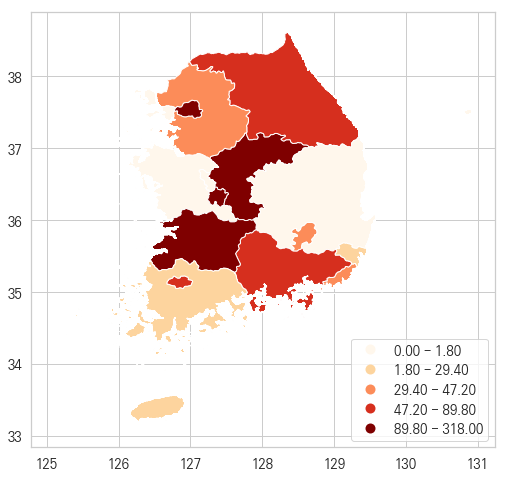

In [13]:
# 시도별 기사건수 지도화
f, ax = plt.subplots(1, 1, figsize=(16, 8))
gdf.plot(column='기사건수', ax=ax,
         legend=True, legend_kwds={'loc': 'lower right'},
         cmap='OrRd', scheme='quantiles')
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')